In [4]:
import classes

Resizing Masks: 100%|██████████| 48/48 [00:00<00:00, 1301.96it/s]


 (768, 1024, 3) -> (192, 256, 3)


In [ ]:
# ## from classes import *

# puzzle = Puzzle(MATCH_IMGS)
# corner_piece = puzzle.pieces[3]

# # Start BFS by adding in the bottom left corner piece
# queue = []
# queue.append(corner_piece)
# corner_piece.insert()
# corner_piece.inserted = True

# # Loop through self.edge_list of the corner piece and find the two flat edges (lets call them first_edge
# # and second_edge where second_edge is anti-clockwise of first_edge). first_edge.point2
# # should be the same coordinates as second_edge.point1

# # edges are in anti clock wise, so flat 1 flat 2, the mod operator is to make the index a rolling index (0-1 = 3)

# first_edge:Edge = None
# second_edge:Edge = None
# for i in range(4):
#     if(corner_piece.edge_list[i].is_flat == True):
#         if(corner_piece.edge_list[(i - 1) % 4].is_flat == True):
#             first_edge = corner_piece.edge_list[(i - 1) % 4]
#             second_edge = corner_piece.edge_list[i]
#         elif(corner_piece.edge_list[(i + 1) % 4].is_flat == True):
#             first_edge = corner_piece.edge_list[i]
#             second_edge = corner_piece.edge_list[(i + 1) % 4]
#         else:
#             raise Exception("Not a corner piece") 
# if(set(first_edge.point2) != set(second_edge.point1) ):
#     raise Exception("Flat edges dont share corner point")

# # add first edge point2

# # I dont know if i miss-understand, col,row major means that the bottom left is at 0,699, or is it 0,799?
# piece_height = abs(first_edge.point2[0] - first_edge.point1[0])
# piece_width = abs(second_edge.point2[1] - first_edge.point2[1])

# pts_src = [
#     first_edge.point2[::-1].tolist(),
#     first_edge.point1[::-1].tolist(),
#     second_edge.point2[::-1].tolist()
# ]
# pts_dst = [
#     [0,canvas.shape[0]-1],  # Bottom-left (scaled proportionally)
#     [0,799 - piece_height],  # Along left edge
#     [second_edge.point2[0].item(),canvas.shape[0]-1]  # Along bottom edge
# ]

# pts_src = np.array(pts_src,dtype=np.float32)
# pts_dst = np.array(pts_dst,dtype=np.float32)

# M = cv2.getAffineTransform(pts_src,pts_dst)
# corner_piece.dst = cv2.warpAffine(corner_piece.image,M,(700,800))
# mask_warped = cv2.warpAffine(corner_piece.mask,M,(700,800))

# # make it 3 channel to multiply with RGB image, then overlay it with the destination.
# mask_3_channel = cv2.merge([mask_warped, mask_warped, mask_warped])
# corner_piece.dst = mask_3_channel*corner_piece.dst 
# # plt.imshow(corner_piece.image)
# plt.imshow(corner_piece.dst)
# plt.show()

Resizing Masks: 100%|██████████| 48/48 [00:00<00:00, 3078.53it/s]



 (768, 1024, 3) -> (192, 256, 3)


Generating Pieces: 48it [00:00, 8084.43it/s]

Updated piece type: corner
	 -> inside corner


Final Destination Points: [[  0.      799.     ]
 [  0.      679.8747 ]
 [140.84547 799.     ]]


Updating Edges
Update Complete
done inserting!
Updated piece type: edge
	 -> inside edge
Connected edge found!, 3
Edge lies along the bottom of the puzzle.
Final Destination Points: [[ 924.15845  753.4714 ]
 [ 925.6448   608.8017 ]
 [1011.6448   608.8017 ]]
Updating Edges
Update Complete
done inserting edge!


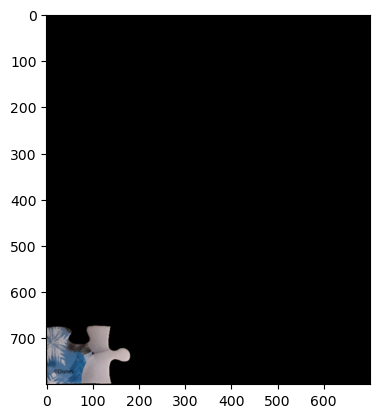

In [1]:
from classes import *
puzzle = Puzzle(MATCH_IMGS)
corner_piece = puzzle.pieces[3]
# corner_piece.piece_type = "corner"
corner_piece.insert()

e1 = puzzle.pieces[6]
# e1.piece_type  ="edge"
e1.insert()

plt.imshow(corner_piece.dst)
# e2 = puzzle.pieces[44]
# e2.piece_type  ="edge"
# e2.insert()

# e3 = puzzle.pieces[31]
# e3.piece_type  ="edge"
# e3.insert()



# plt.imshow(e1.dst)
# plt.show()

Resizing Masks: 100%|██████████| 48/48 [00:00<00:00, 4898.81it/s]



 (768, 1024, 3) -> (192, 256, 3)


Generating Pieces: 48it [00:00, 8721.86it/s]


Updated piece type: corner
	 -> inside corner


Final Destination Points: [[  0.      799.     ]
 [  0.      679.8747 ]
 [140.84547 799.     ]]


done inserting!
Corner Piece Coordinates:
(800, 700, 3)
Updated piece type: edge
	 -> inside edge
Connected edge found!, 3
Edge lies along the left side of the puzzle.


Final Destination Points: [[924.15845 753.4714 ]
 [925.6448  608.8017 ]
 [924.15845 839.4714 ]]


done inserting!
Updated piece type: edge
	 -> inside edge
Connected edge found!, 3
Edge lies along the bottom of the puzzle.


Final Destination Points: [[925.6448 608.8017]
 [758.7372 610.373 ]
 [830.7372 610.373 ]]


done inserting!
Updated piece type: edge
	 -> inside edge
Connected edge found!, 44
Edge lies along the left side of the puzzle.


Final Destination Points: [[2090.8862  603.6334]
 [2136.1855  603.6717]
 [2090.8862  866.6334]]


done inserting!


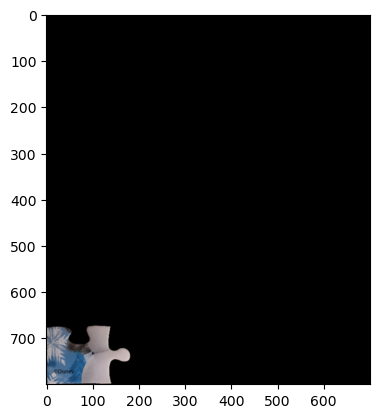

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from classes import *


puzzle = Puzzle(MATCH_IMGS)

#testing the corner piece
corner_piece = puzzle.pieces[3]
# corner_piece.piece_type = "corner"
corner_piece.insert()

# corner piece coordinates
print("Corner Piece Coordinates:")
print(corner_piece.dst.shape) 

if corner_piece.dst.dtype == np.float32:
    corner_piece.dst = (corner_piece.dst * 255).astype(np.uint8)




# Overlay the corner piece on the canvas
canvas = cv2.add(canvas, corner_piece.dst)

# Insert edge pieces and check their coordinates
edge_indices = [6, 44, 31]  # Example indices for edge pieces
for index in edge_indices:
    edge_piece = puzzle.pieces[index]
    # edge_piece.piece_type = "edge"
    edge_piece.insert()
    
    # Print edge piece coordinates
    # print(f"Edge Piece {index} Coordinates:")
    # print(edge_piece.dst.shape)  # Check the dimensions of the image

    # Convert edge piece to uint8 if necessary
    if edge_piece.dst.dtype == np.float32:
        edge_piece.dst = (edge_piece.dst * 255).astype(np.uint8)

    canvas = cv2.add(canvas, edge_piece.dst)

# interior_piece = puzzle.pieces[37]
# interior_piece.insert()
# if interior_piece.dst.dtype == np.float32:
#     interior_piece.dst = (interior_piece.dst * 255).astype(np.uint8)

# canvas = cv2.add(canvas, interior_piece.dst)
# Display the result
plt.imshow(canvas)  # Ensure canvas has three channels for color
plt.show()
